In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('141273-regression.txt', sep='\t')
X = df.drop(columns='class').values
y = df['class'].values
print(X.shape, y.shape)

(435, 77) (435,)


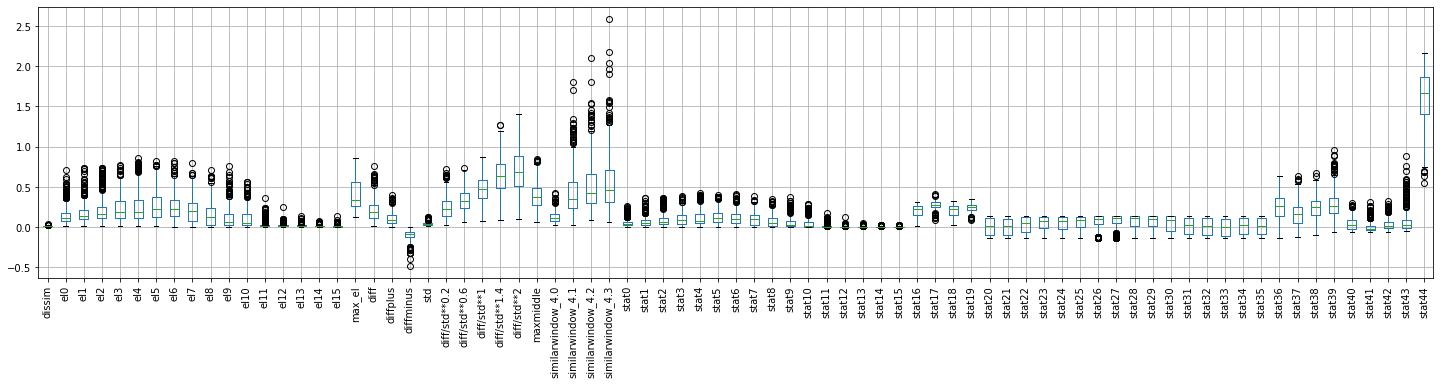

In [ ]:
plt.subplots(figsize=(25,5))

df.drop(columns='class').boxplot()

plt.xticks(rotation=90)
plt.show()

In [ ]:
min(df['diffminus'])

-0.48311

In [ ]:
max(df['similarwindow_4.3'])

2.589

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as MAE, median_absolute_error as MedAE

In [ ]:
metrics = dict(MAE=MAE, MedAE=MedAE)
hidden = (100,)
iters = 10_000

models = dict(
    tree_2=DecisionTreeRegressor(max_depth=2),
    tree_unlimited=DecisionTreeRegressor(),
    linear=LinearRegression(normalize=False),
    knn=KNeighborsRegressor(),
    mlp=MLPRegressor(hidden_layer_sizes=hidden, max_iter=iters),
    linear_svr=SVR(kernel='linear'),
    rbf_svr=SVR(kernel='rbf'),
)

In [ ]:
res = []
for model_name, model in models.items():
    model.fit(X, y)
    Y = model.predict(X)
    res.append(dict(Model=model_name, MAE=MAE(Y, y), MedAE=MedAE(Y, y)))
res = pd.DataFrame(res)

mae = res.drop(columns='MedAE')
medae = res.drop(columns='MAE')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


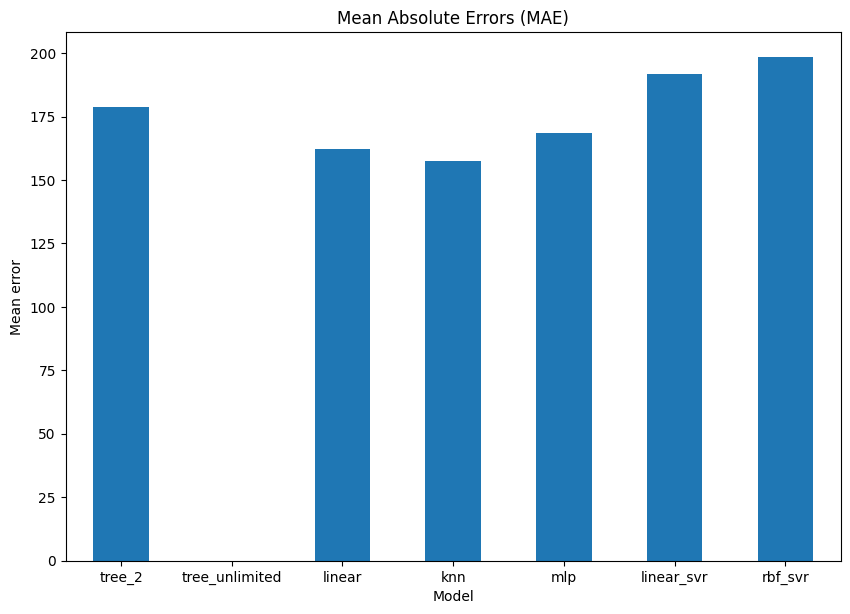

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
mae.plot.bar(x='Model', title='Mean Absolute Errors (MAE)', legend=None)
plt.xticks(rotation=0)
plt.ylabel('Mean error')
plt.show()

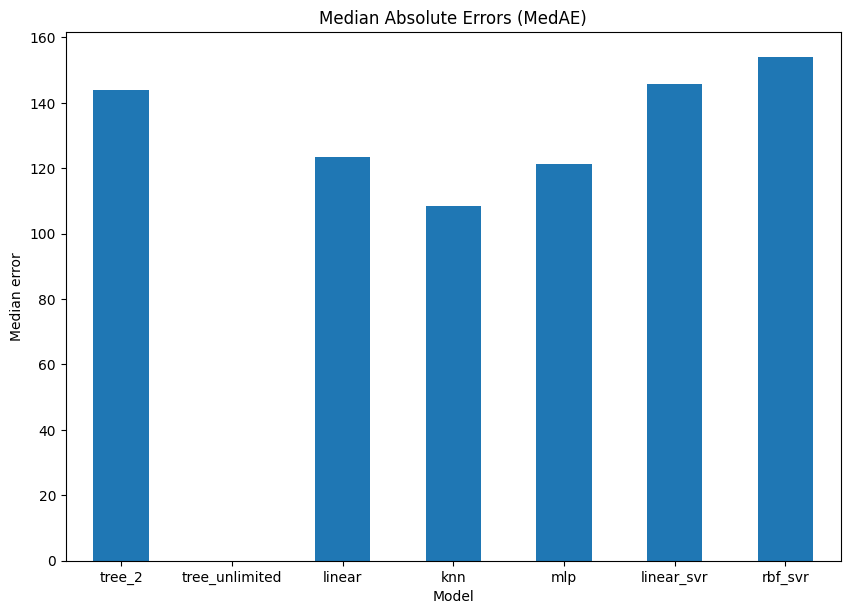

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
medae.plot.bar(x='Model', title='Median Absolute Errors (MedAE)', legend=None)
plt.xticks(rotation=0)
plt.ylabel('Median error')
plt.show()

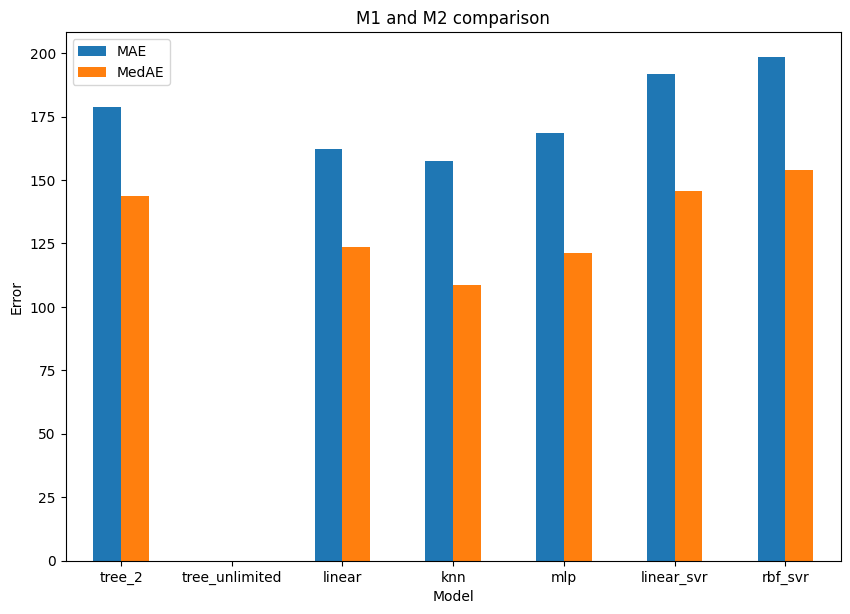

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
res.plot.bar(x='Model', title='M1 and M2 comparison')
plt.xticks(rotation=0)
plt.ylabel('Error')
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

models = dict(
    tree_2=DecisionTreeRegressor(max_depth=2),
    tree_unlimited=DecisionTreeRegressor(),
    linear=make_pipeline(StandardScaler(), LinearRegression()),
    knn=make_pipeline(StandardScaler(), KNeighborsRegressor()),
    mlp=make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=hidden, max_iter=iters)),
    linear_svr=make_pipeline(StandardScaler(), SVR(kernel='linear')),
    rbf_svr=make_pipeline(StandardScaler(), SVR(kernel='rbf')),
)

res2 = []
for model_name, model in models.items():
    model.fit(X, y)
    Y = model.predict(X)
    res2.append(dict(Model=model_name, MAE=MAE(Y, y), MedAE=MedAE(Y, y)))
res2 = pd.DataFrame(res2)
res2.rename(columns = {'MAE':'MAE_norm', 'MedAE':'MedAE_norm'}, inplace = True)

mae2 = res2.drop(columns='MedAE_norm')
medae2 = res2.drop(columns='MAE_norm')

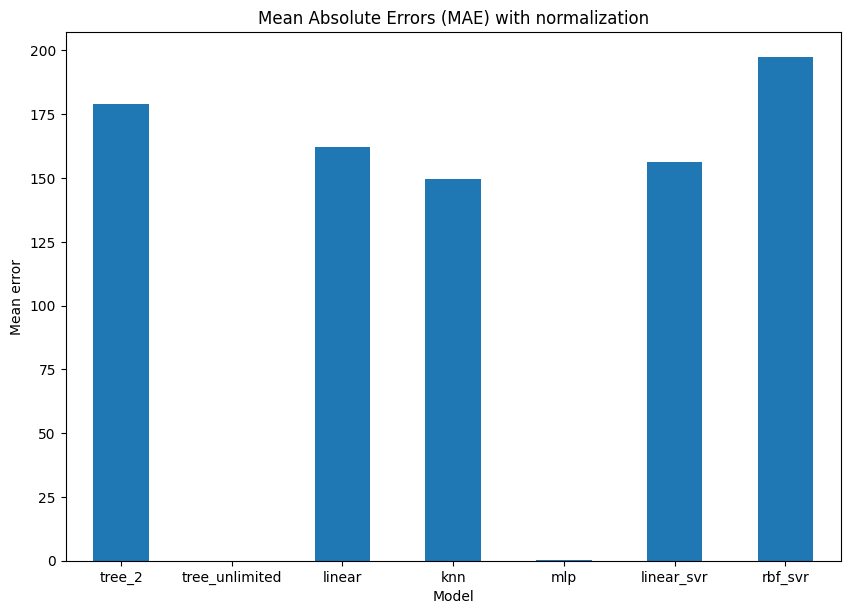

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
mae2.plot.bar(x='Model', title='Mean Absolute Errors (MAE) with normalization', legend=None)
plt.xticks(rotation=0)
plt.ylabel('Mean error')
plt.show()

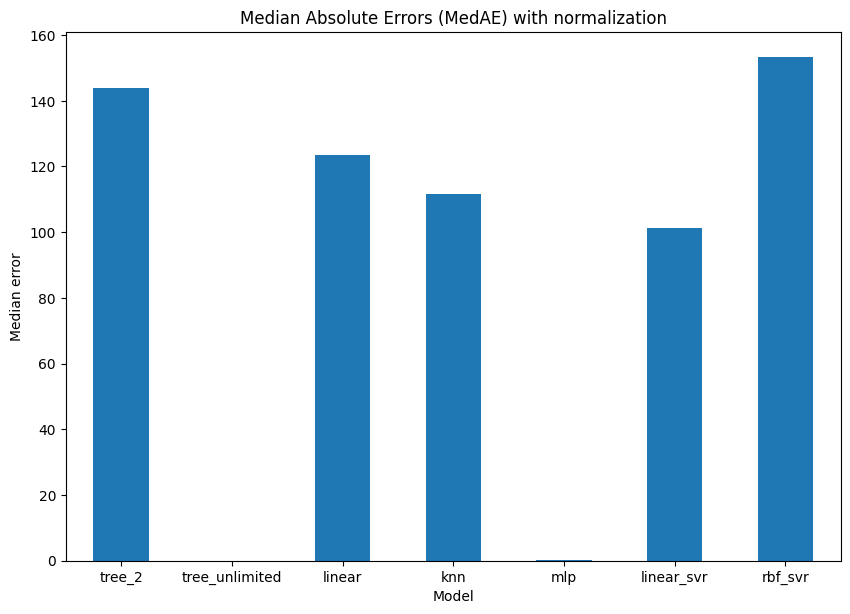

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
medae2.plot.bar(x='Model', title='Median Absolute Errors (MedAE) with normalization', legend=None)
plt.xticks(rotation=0)
plt.ylabel('Median error')
plt.show()

In [ ]:
res

,Model,MAE,MedAE
0,tree_2,178.909997,143.871681
1,tree_unlimited,0.000000,0.000000
2,linear,162.100542,123.416197
3,knn,157.683218,108.500000
4,mlp,168.692702,121.359424
5,linear_svr,191.977382,145.710599
6,rbf_svr,198.385648,153.919293


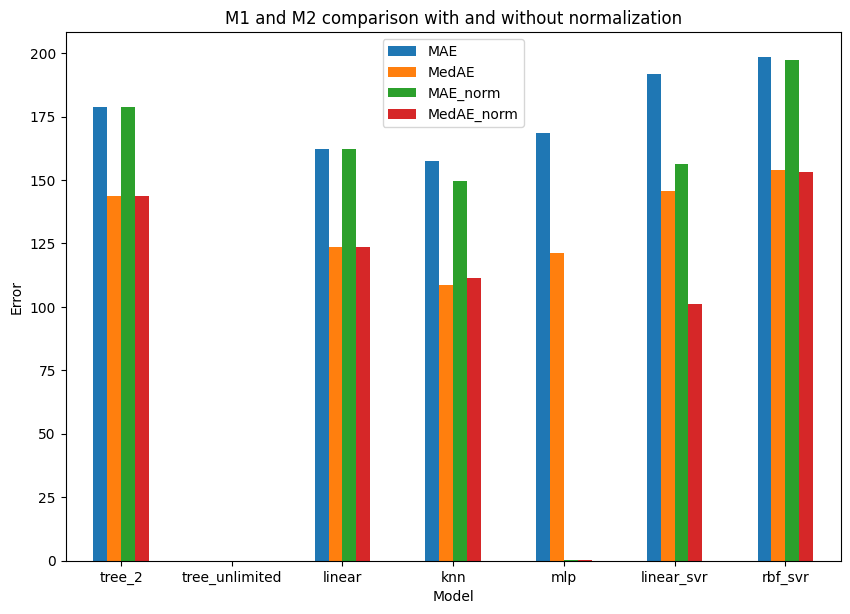

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
res_total = res.join(res2.drop(columns='Model'))

res_total.plot.bar(x='Model', title='M1 and M2 comparison with and without normalization')
plt.xticks(rotation=0)
plt.ylabel('Error')
plt.show()

In [ ]:
res_total

,Model,MAE,MedAE,MAE_norm,MedAE_norm
0,tree_2,178.909997,143.871681,178.909997,143.871681
1,tree_unlimited,0.000000,0.000000,0.000000,0.000000
2,linear,162.100542,123.416197,162.100542,123.416197
3,knn,157.683218,108.500000,149.569425,111.500000
4,mlp,168.692702,121.359424,0.108155,0.072225
5,linear_svr,191.977382,145.710599,156.461119,101.279858
6,rbf_svr,198.385648,153.919293,197.344566,153.250612


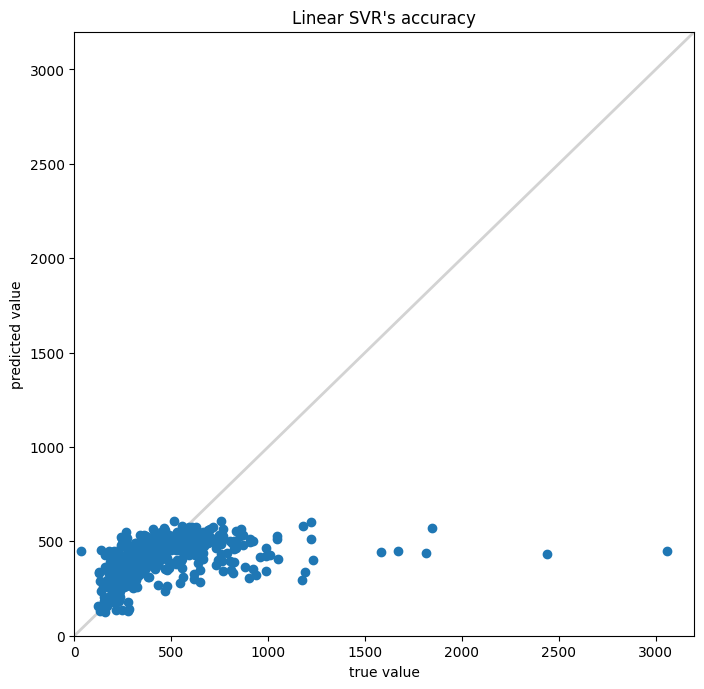

In [ ]:
single_model = [
    # DecisionTreeRegressor(max_depth=2)
    # DecisionTreeRegressor()
    # make_pipeline(StandardScaler(), LinearRegression())
    # make_pipeline(StandardScaler(), KNeighborsRegressor())
    # make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=hidden, max_iter=iters))
    make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
    # make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='scale', C=1))
][0]

single_model.fit(X, y)
Y = single_model.predict(X)

maxx = 3200
xs = np.linspace(0, maxx, 2)
plt.figure(figsize=(8, 8))
plt.plot(xs, xs, lw=2, zorder=1, color='lightgray')
plt.scatter(y, Y, zorder=2, cmap='red')
plt.xlim(0, maxx)
plt.ylim(0, maxx)
plt.title("Linear SVR's accuracy")
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

models = dict(
    tree_2=DecisionTreeRegressor(max_depth=2),
    tree_unlimited=DecisionTreeRegressor(),
    linear=make_pipeline(StandardScaler(), LinearRegression()),
    knn=make_pipeline(StandardScaler(), KNeighborsRegressor()),
    mlp=make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=hidden, max_iter=iters)),
    linear_svr=make_pipeline(StandardScaler(), SVR(kernel='linear')),
    rbf_svr=make_pipeline(StandardScaler(), SVR(kernel='rbf')),
)

res = []
for model_name, model in models.items():
    cv = cross_validate(model, X, y, scoring=dict(MAE=make_scorer(MAE), MedAE=make_scorer(MedAE)), cv=10)
    # print(cv)
    res.append(dict(Model=model_name, MAE=np.mean(cv['test_MAE']), MedAE=np.mean(cv['test_MedAE'])))
    print(f"{model_name} done!")
res_cross = pd.DataFrame(res)
res_cross

tree_2 done!
tree_unlimited done!
linear done!
knn done!
mlp done!
linear_svr done!
rbf_svr done!


,Model,MAE,MedAE
0,tree_2,225.997531,172.372575
1,tree_unlimited,268.995957,184.150000
2,linear,217.365338,156.888583
3,knn,216.726834,171.415000
4,mlp,287.111765,227.012381
5,linear_svr,183.139189,131.390710
6,rbf_svr,215.183472,171.143140


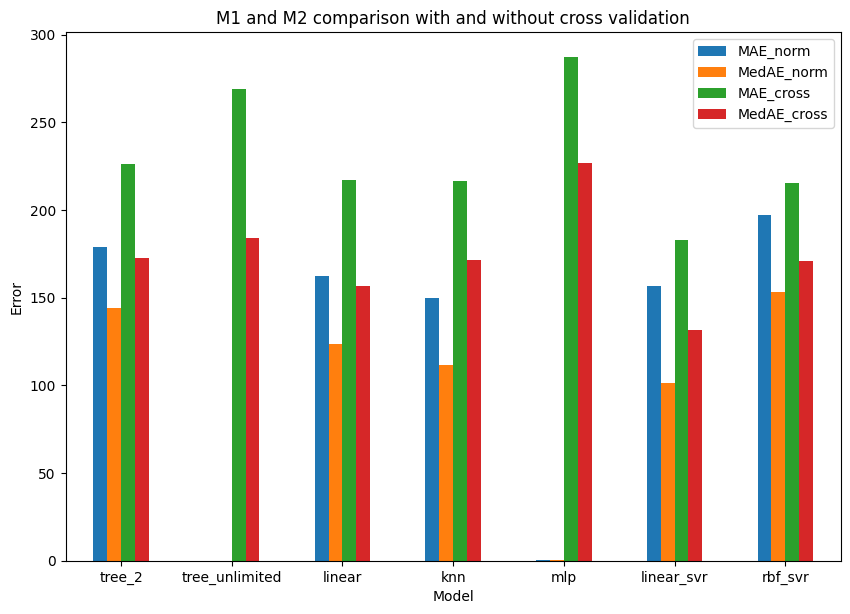

In [ ]:
res_cross.rename(columns = {'MAE':'MAE_cross', 'MedAE':'MedAE_cross'}, inplace = True)

plt.rc('figure', figsize=(10, 7), dpi=100)
res_final = res2.join(res_cross.drop(columns='Model'))

res_final.plot.bar(x='Model', title='M1 and M2 comparison with and without cross validation')
plt.xticks(rotation=0)
plt.ylabel('Error')
plt.show()

            Model   MAE_cross  MedAE_cross
0          tree_2  225.997531   172.372575
1  tree_unlimited  268.995957   184.150000
2          linear  217.365338   156.888583
3             knn  216.726834   171.415000
4             mlp  287.111765   227.012381
5      linear_svr  183.139189   131.390710
6         rbf_svr  215.183472   171.143140


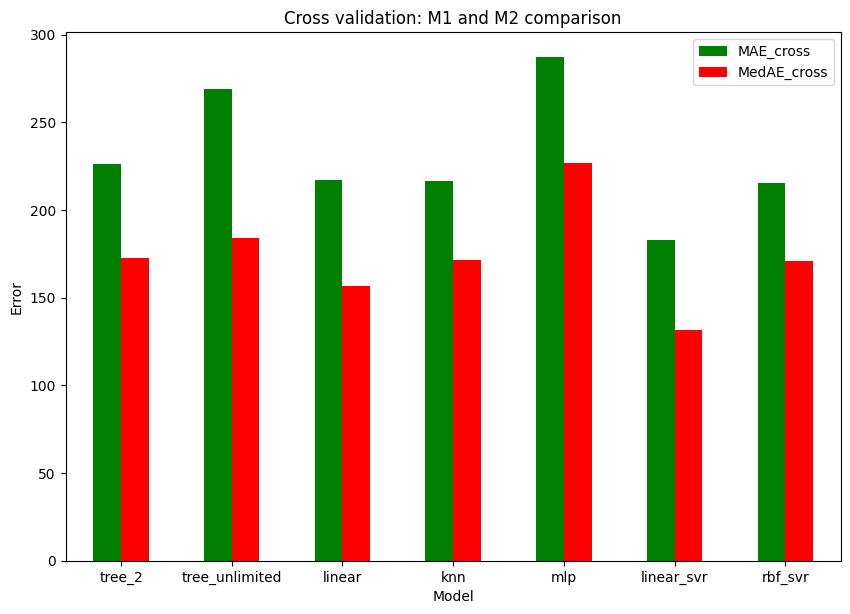

In [ ]:
plt.rc('figure', figsize=(10, 7), dpi=100)
my_colors = ['g', 'r']

print(res_cross)
res_cross.plot.bar(x='Model', title='Cross validation: M1 and M2 comparison', color=my_colors)
plt.xticks(rotation=0)
plt.ylabel('Error')
plt.show()